In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from itertools import *
nba = pd.read_csv("nba.csv")
pd.set_option('display.max_columns', None)
nba = nba.drop(columns=["Player-additional", "Rk"])
nba = nba.drop_duplicates(subset='Player', keep='first')
nba

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23,TOR,47,11,21.4,3.4,7.2,0.474,0.4,1.8,0.247,3.0,5.4,0.549,0.504,1.7,2.5,0.698,1.8,4.1,6.0,1.0,0.6,0.6,1.1,2.0,9.0
1,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25,MIA,70,70,35.2,8.2,15.2,0.542,0.0,0.2,0.083,8.2,15.0,0.548,0.543,4.4,5.5,0.803,2.4,6.8,9.3,3.3,1.2,0.9,2.6,2.9,20.9
3,Ochai Agbaji,SG,22,UTA,51,14,19.0,2.4,5.4,0.447,1.3,3.4,0.378,1.1,2.0,0.563,0.565,0.7,0.9,0.745,0.7,1.2,1.9,0.9,0.3,0.2,0.5,1.6,6.8
4,Santi Aldama,PF,22,MEM,70,18,22.0,3.3,7.0,0.470,1.3,3.6,0.353,2.0,3.4,0.596,0.562,1.4,1.9,0.740,1.1,3.6,4.7,1.3,0.6,0.6,0.7,1.9,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
650,Trae Young,PG,24,ATL,67,67,34.6,8.4,19.4,0.434,2.2,6.4,0.340,6.2,13.0,0.480,0.490,7.6,8.6,0.887,0.8,2.3,3.1,10.0,1.1,0.1,4.1,1.5,26.6
651,Omer Yurtseven,C,24,MIA,6,0,6.2,0.8,1.5,0.556,0.0,0.2,0.000,0.8,1.3,0.625,0.556,0.3,0.5,0.667,0.7,0.8,1.5,0.0,0.2,0.2,0.2,1.0,2.0
652,Cody Zeller,C,30,MIA,10,0,13.0,1.5,2.9,0.517,0.0,0.1,0.000,1.5,2.8,0.536,0.517,1.7,2.3,0.739,1.6,1.9,3.5,0.6,0.2,0.4,0.8,2.3,4.7


DataFrame с данными о баскетбольных игроках. Столбцы содержат следующую информацию:  

Player: имя игрока  
Pos: позиция игрока  
Age: возраст игрока  
Tm: команда игрока  
G: количество сыгранных игр  
GS: количество игр, начатых в стартовом составе  
MP: среднее количество минут, проведенных на площадке за игру  
FG: среднее количество успешных бросков за игру  
FGA: среднее количество попыток броска за игру  
FG%: процент успешных бросков  
3P: среднее количество успешных трехочковых бросков за игру  
3PA: среднее количество попыток трехочкового броска за игру  
3P%: процент успешных трехочковых бросков  
2P: среднее количество успешных двухочковых бросков за игру  
2PA: среднее количество попыток двухочкового броска за игру  
2P%: процент успешных двухочковых бросков  
eFG%: эффективный процент попадания (учитывает дополнительные очки за трехочковые броски)  
FT: среднее количество успешных штрафных бросков за игру  
FTA: среднее количество попыток штрафного броска за игру  
FT%: процент успешных штрафных бросков  
ORB: среднее количество подборов в нападении за игру  
DRB: среднее количество подборов в защите за игру  
TRB: среднее общее количество подборов за игру  
AST: среднее количество передач за игру  
STL: среднее количество перехватов за игру  
BLK: среднее количество блокшотов за игру  
TOV: среднее количество потерь мяча за игру  
PF: среднее количество фолов за игру  
PTS: среднее количество набранных очков за игру  

Если сравнивать среднее значение параметров и их медиану, то можно заменить, что среднее занчение приемущественно чуть больше чем медиана.

In [8]:
nba.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,519.000000,522.000000,522.000000,503.000000,522.000000,522.000000,516.000000,519.000000,522.000000,522.000000,488.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,25.764368,44.829502,21.302682,19.439464,3.277395,6.969732,0.463738,0.964176,2.714943,0.318189,2.312835,4.254023,0.537109,0.531347,1.431226,1.841379,0.752242,0.858046,2.625670,3.482950,2.000192,0.597701,0.377778,1.086973,1.675479,8.950000
std,4.327748,22.057934,25.476427,9.900128,2.498289,5.108035,0.113429,0.876326,2.275457,0.131124,2.016308,3.603873,0.141147,0.111514,1.580909,1.929887,0.148016,0.746291,1.826251,2.409633,1.920358,0.391849,0.386982,0.837659,0.798999,7.026034
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,30.000000,0.000000,11.600000,1.400000,3.100000,0.415000,0.300000,0.825000,0.285500,0.900000,1.600000,0.486750,0.496500,0.400000,0.600000,0.685750,0.300000,1.300000,1.700000,0.700000,0.300000,0.100000,0.500000,1.100000,3.800000
50%,25.000000,51.000000,7.000000,18.500000,2.500000,5.500000,0.457000,0.800000,2.300000,0.343000,1.650000,3.100000,0.535000,0.537000,0.900000,1.200000,0.768500,0.700000,2.300000,3.000000,1.300000,0.600000,0.300000,0.900000,1.700000,7.000000
75%,29.000000,63.000000,45.750000,28.100000,4.300000,9.550000,0.506500,1.500000,4.000000,0.383500,3.200000,5.800000,0.598000,0.578000,1.800000,2.300000,0.842500,1.100000,3.575000,4.600000,2.700000,0.800000,0.500000,1.500000,2.200000,12.000000
max,42.000000,75.000000,75.000000,37.500000,11.300000,22.600000,1.000000,4.900000,11.300000,1.000000,10.400000,17.900000,1.000000,1.000000,10.200000,12.300000,1.000000,5.100000,9.500000,12.500000,10.800000,2.000000,3.000000,4.100000,3.900000,33.300000


In [9]:
nba.isna().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        3
3P         0
3PA        0
3P%       19
2P         0
2PA        0
2P%        6
eFG%       3
FT         0
FTA        0
FT%       34
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

Пропущенные значения появляются там, где считается процент попадания какого-то вида броска или эффективности, его нельзя посчитать, когда было совершено 0 попыток, значит и 0 попаданий, потому что происходит в формуле деление на 0. Заменим пропуски значением 0.

In [10]:
nba = nba.fillna(0)

С помощью правла трех сигм найдем параметры, которые распределены нормально. Если рассчитанные доли значений, попадающих в эти интервалы, близки к теоретическим, то это может указывать на то, что данные распределены нормально.

In [18]:
headers = nba.select_dtypes(include=['float64', 'int']).columns.values
norma = []
for head in headers:
    samples = nba[head]
    loc = samples.mean()
    scale = samples.std()
    flag = 0
    for i in range(1, 4):    
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        if abs(true_value - sample_value) < 0.04:
            flag+=1
    if flag == 3:
        norma.append(head)   
for k in norma:
    print(k)
    samples = nba[k]
    loc = samples.mean()
    scale = samples.std()
    for i in range(1, 4):    
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        print(f' {i} sigma(s): \ttheoretical:\t{true_value}')
        print(f'\t\tsample:\t\t{sample_value}')
    print()


Age
 1 sigma(s): 	theoretical:	0.6826894921370859
		sample:		0.6877394636015326
 2 sigma(s): 	theoretical:	0.9544997361036416
		sample:		0.9636015325670498
 3 sigma(s): 	theoretical:	0.9973002039367398
		sample:		0.9961685823754789

FG
 1 sigma(s): 	theoretical:	0.6826894921370859
		sample:		0.7222222222222222
 2 sigma(s): 	theoretical:	0.9544997361036416
		sample:		0.9425287356321839
 3 sigma(s): 	theoretical:	0.9973002039367398
		sample:		0.9923371647509579

FGA
 1 sigma(s): 	theoretical:	0.6826894921370859
		sample:		0.7164750957854407
 2 sigma(s): 	theoretical:	0.9544997361036416
		sample:		0.9310344827586207
 3 sigma(s): 	theoretical:	0.9973002039367398
		sample:		0.9980842911877394

3P
 1 sigma(s): 	theoretical:	0.6826894921370859
		sample:		0.6915708812260536
 2 sigma(s): 	theoretical:	0.9544997361036416
		sample:		0.9540229885057471
 3 sigma(s): 	theoretical:	0.9973002039367398
		sample:		0.9904214559386973

3PA
 1 sigma(s): 	theoretical:	0.6826894921370859
		sample:		0.6666666

Построим гистограммы признаков, которые согласно правилу трех сигм являются нормальными.

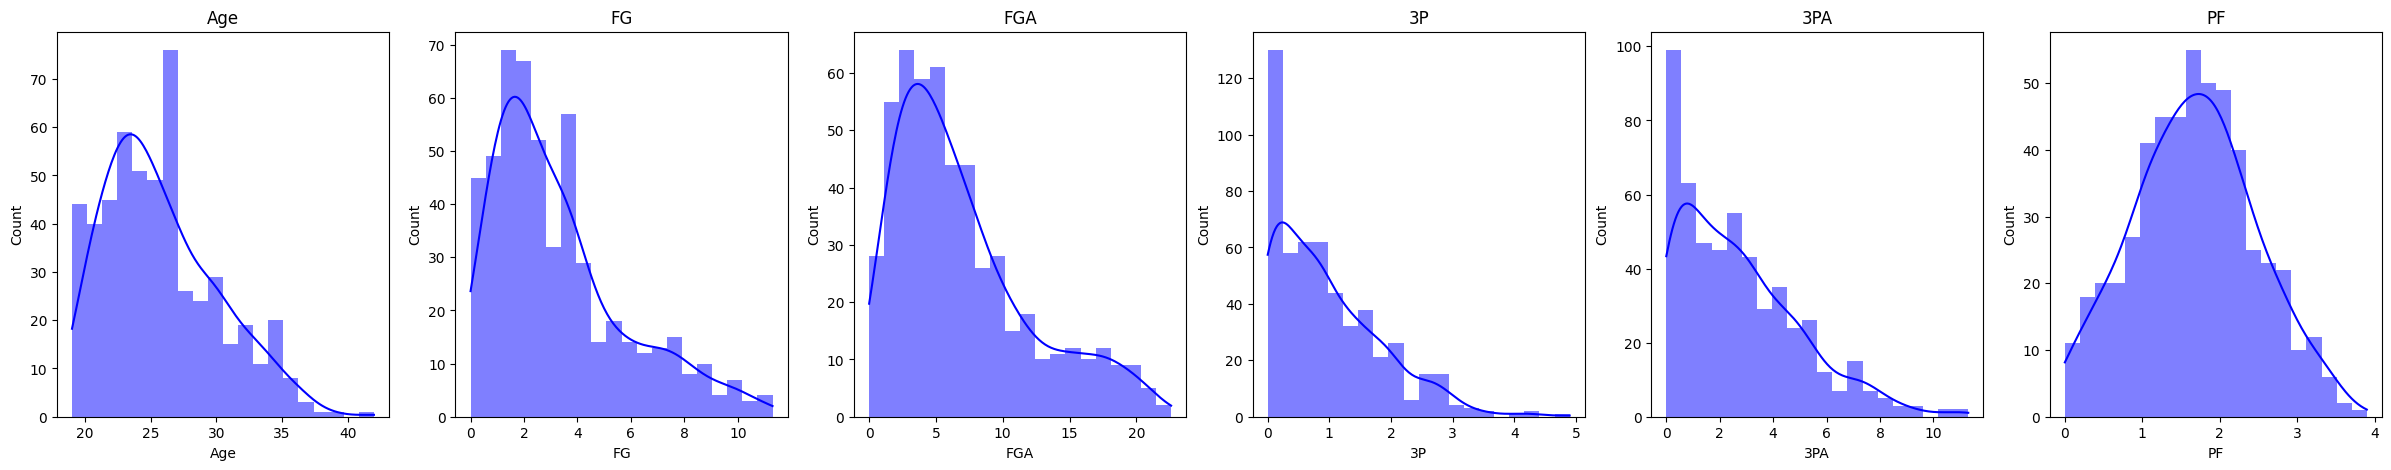

In [39]:
fig, ax = plt.subplots(1, len(norma), figsize = (5 * len(norma), 5))
for i in range(len(norma)):
    ax[i].set_title(norma[i])
    sns.histplot(nba[norma[i]],bins=20,color="blue", kde=True, linewidth=0, ax=ax[i])
plt.show()

Построим Q-Q кривую для интересующих нас признаков.

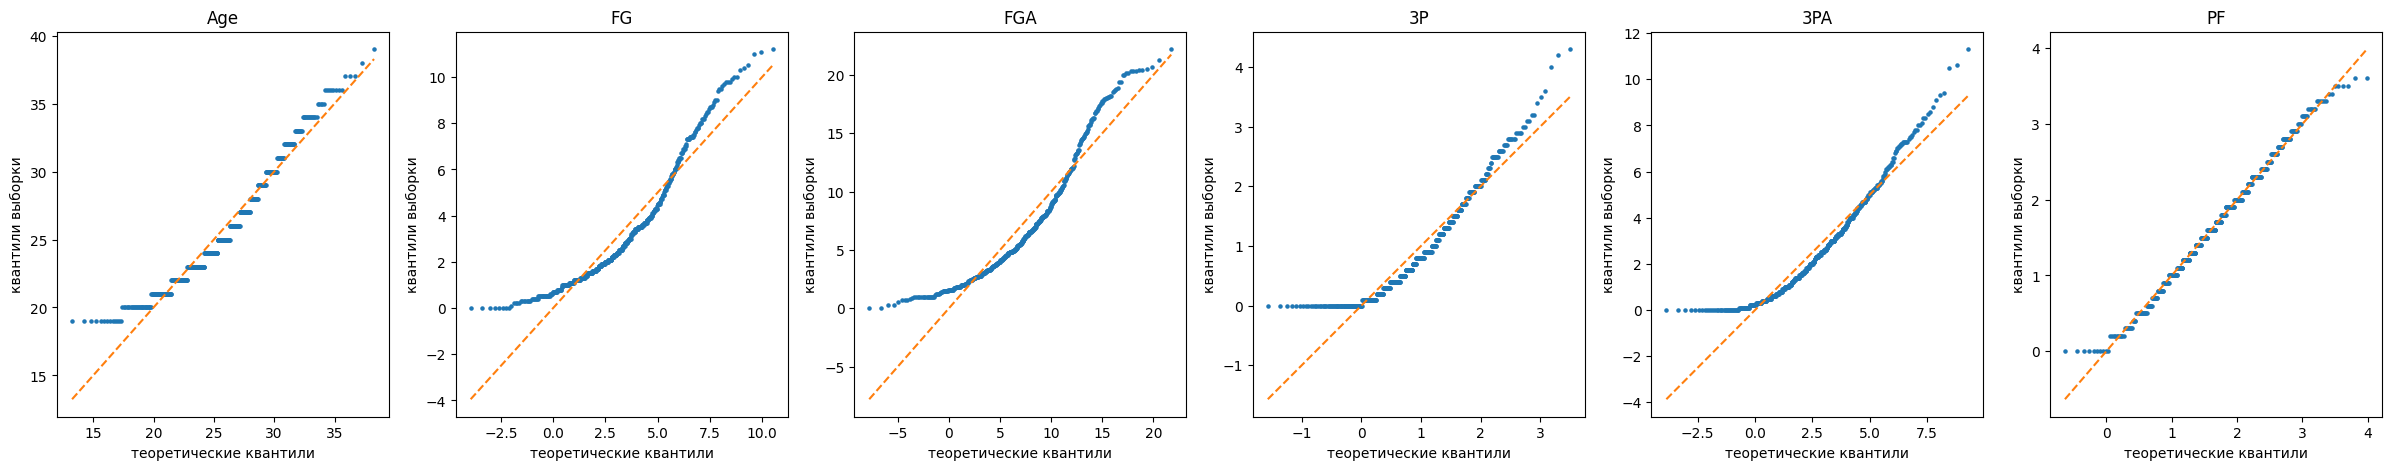

In [ ]:

fig, ax = plt.subplots(1, len(norma), figsize = (5 * len(norma), 5))
for i in range(len(norma)):
    samples = nba[norma[i]]
    loc = samples.mean()
    scale = samples.std()
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    ax[i].scatter(x, y, s=5)
    ax[i].plot(x, x, color='C1', linestyle='dashed')
    ax[i].set_title(norma[i])
    ax[i].set_xlabel('теоретические квантили')
    ax[i].set_ylabel('квантили выборки')
plt.show()

Визуализиров зависимость и проведя линию регрессии, мы видим, что зависимость между возрастом игрока и персональными фолами есть.

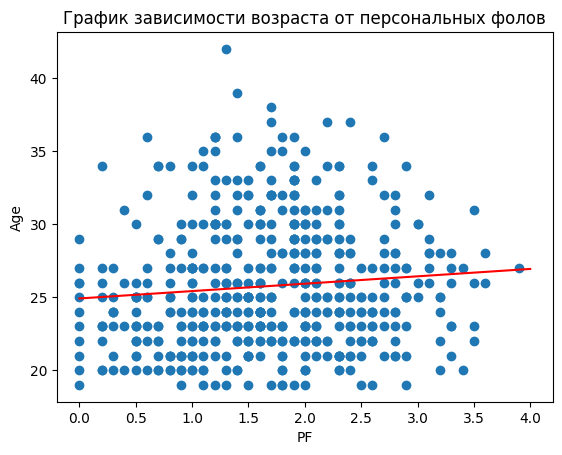

In [19]:
b1 = np.cov(nba['PF'], nba['Age'], ddof=1)[0, 1] / np.var(nba['PF'], ddof=1)
b0 = nba['Age'].mean() - b1 * nba['PF'].mean()
x = np.linspace(0, 4, 500)
plt.scatter(  nba['PF'], nba['Age'])
plt.title('График зависимости возраста от персональных фолов')
plt.xlabel('PF')
plt.ylabel('Age')
plt.plot(x, b1*x + b0, color='red')
plt.show()



# Игроки какой позиции какой бросок предпочитают?  
Разыгрывающий (PG) часто атакует. Зарабатывает очки любым видом атаки.  
Атакующий защитник (SG) предпочитает атаку с трехочковой линии, откуда он забивает с хорошим процентом реализации.  
Легкий форвард(SF) реже остальных атакует двухочковыми бросками. При этом реализация всех видов бросков на высоком уровне.  
Тяжелый форвард (PF) так же не много атакует, при этом больше предпочитает бросать двухочковые броски.  
Центровой (C) делает сильный акцент на двухочковых бросках. При этом трехочковых бросает очень мало. Процент двухочковых на очечнь высоком уровне, а процент атак с дальней на низком.

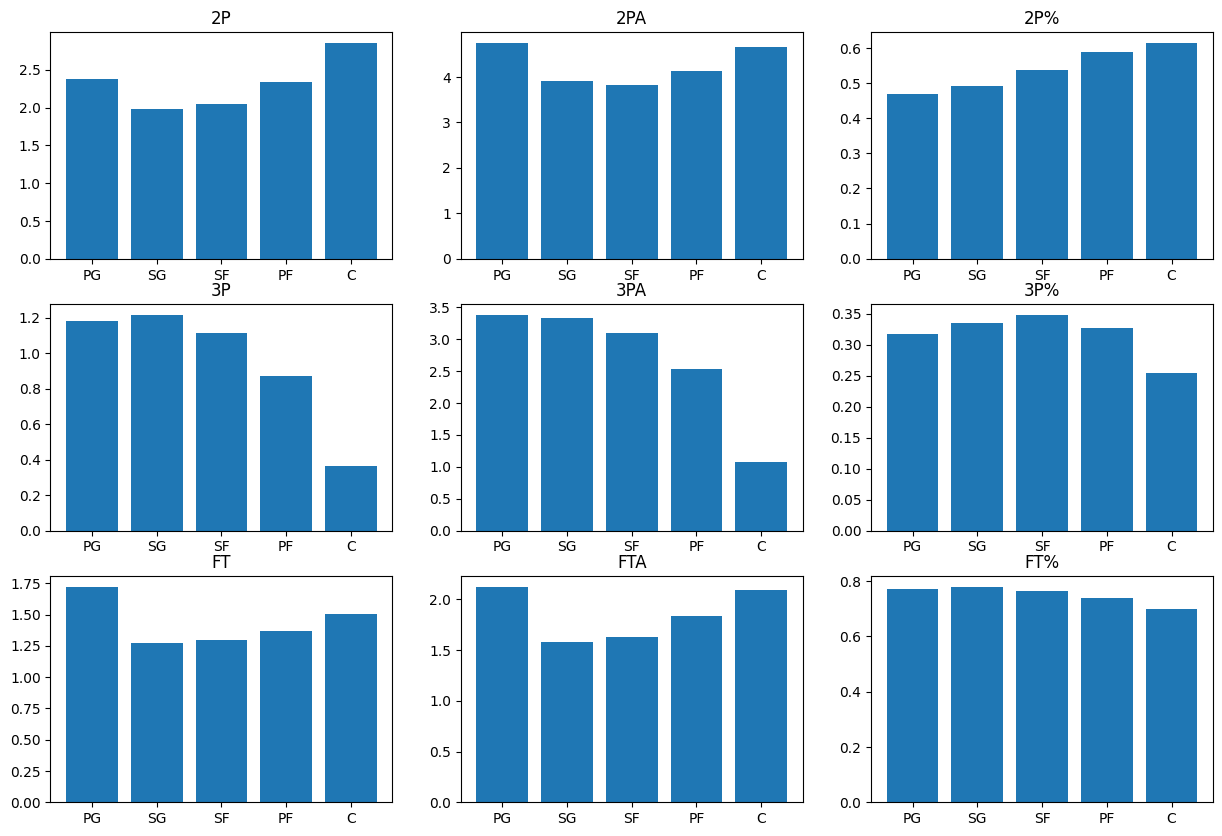

In [ ]:
Pos = ['PG', 'SG', 'SF', 'PF', 'C']
st_ = [['2P', '2PA', '2P%'],['3P', '3PA','3P%'],['FT', 'FTA', 'FT%']]
fig, axs = plt.subplots(3, 3, figsize = (15, 10))
for j in range(3):
    for k in range(3):
        Pt = [ (nba[ (nba['Pos'] == i) ][st_[j][k]]).mean() for i in Pos]
        axs[j][k].bar(Pos, Pt)
        axs[j][k].set_title(st_[j][k])
plt.show()

# Какие параметры влияют на набор очков?  
На набор очков влияет количество игр в старте, среднее количество минут, количество различных атак, потери


C:\Users\user\AppData\Local\Temp\ipykernel_15496\2116563220.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nba.corr(), xticklabels=nba.corr().columns, yticklabels=nba.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt='.2g')


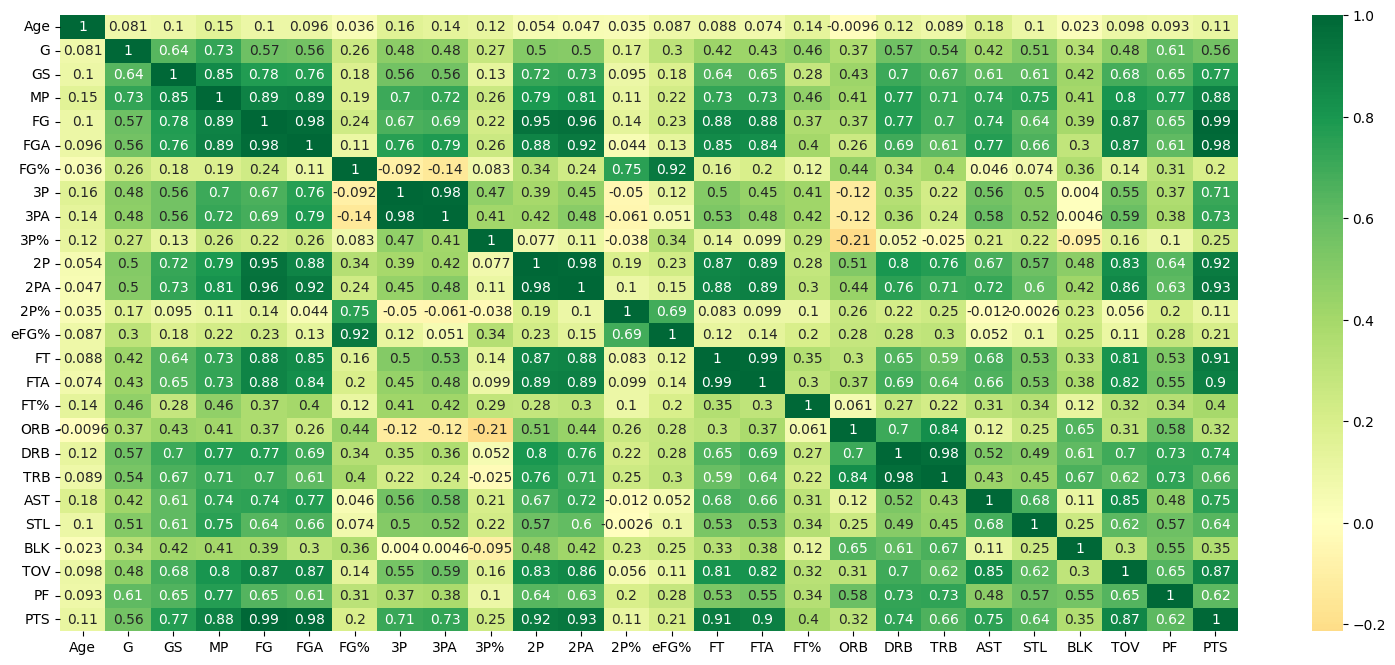

In [15]:
plt.subplots(figsize=(19, 8))
sns.heatmap(nba.corr(), xticklabels=nba.corr().columns, yticklabels=nba.corr().columns, cmap='RdYlGn', center=0, annot=True, fmt='.2g')
plt.show()

# Игроки какиой команды атакуют с лучшей эффективностью и с худшей?
Лучшая эфффективность у Denver Nuggets, худшая у Los Angeles Lakers

In [51]:
nba_team = nba[nba['Tm'] != 'TOT'].groupby('Tm').agg('mean').reset_index()
nba_team = nba_team.sort_values(by='eFG%')
print(nba_team.iloc[0]['Tm'])
print(nba_team.iloc[-1]['Tm'])

LAL
DEN


C:\Users\user\AppData\Local\Temp\ipykernel_17536\941607421.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nba_team = nba[nba['Tm'] != 'TOT'].groupby('Tm').agg('mean').reset_index()


# Топ 5 игроков по фэнтези баллам.  
Официальный формат подсчета фэнтези-очков НБА использует следующие значения:
очки: 1 очко.  
Подборы: 1,2 очка.  
Передачи: 1,5 очка.  
Перехваты: 3 очка.  
Блоки: 3 очка.  
Потери: -1 очко.

In [58]:
nba['FP'] = nba['PTS'] + 1.2 * nba['TRB'] + 1.5 * nba['AST'] + 3 * nba['BLK'] + 3 * nba['STL'] - nba['TOV']
nba = nba.sort_values(by='FP', ascending=False)
print(nba.iloc[0: 5]['Player'])

154              Luka Dončić
176              Joel Embiid
307             Nikola Jokić
12     Giannis Antetokounmpo
135            Anthony Davis
Name: Player, dtype: object


# Топ 5 игроков по фэнтези баллам, если бы все играли по 36 минут.  
Статистика в пересчете на 36 минут используется для оценки производительности игрока более точно, чем его средние показатели за игру. Обычно звезды НБА играют как минимум 36 минут за игру. Эта статистика позволяет сравнивать производительность игроков, которые играют разное количество времени.  
Мы видим тот же список, только в другом порядке.
  

In [25]:
def per_36(column, nba):
    if column.dtype in ['int', 'float'] and column.name not in ['Age', 'G', 'GS', 'FG%', '3P%', '2P%', 'eFG%', 'FT%']:
        return column / nba * 36
    else:
        return column
    
nba_per_36 = nba.apply(per_36, args=(nba['MP'], ))
nba_per_36['FP'] = nba_per_36['PTS'] + 1.2 * nba_per_36['TRB'] + 1.5 * nba_per_36['AST'] + 3 * nba_per_36['BLK'] + 3 * nba_per_36['STL'] - nba_per_36['TOV']
nba_per_36 = nba_per_36.sort_values(by='FP', ascending=False)
print(nba_per_36[nba_per_36['G'] > 10].iloc[0: 5]['Player'])

12     Giannis Antetokounmpo
307             Nikola Jokić
176              Joel Embiid
154              Luka Dončić
135            Anthony Davis
Name: Player, dtype: object


# Выводы
Возраст и количетво фолов распределены нормально. Чем старше игрок, тем чаще он нарушает правила.  
Выбор атаки сильно меняется в зависимости от позиции. Особенно видна разница между разыгрывающим и центровым.  
Среди команд НБА лучшая бросковая эффективность у Denver Nuggets, худшая у Los Angeles Lakers.  
Сильнейшие игроки по фэнтези баллам: Giannis Antetokounmpo ,Nikola Jokić, Joel Embiid, Luka Dončić,Anthony Davis